# 
XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by 
knowing about its (XGBoost) objective function and base learners.
There are several metrics involved in regression like root-mean-squared error (RMSE) and mean-squared-error (MAE). These are 
some key members for XGBoost models, each plays their important roles.

The objective function contains loss function and a regularization term. It tells about the difference between actual values 
and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for 
regression problems is reg:linear, and that for binary classification is reg:logistics.

Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and 
XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the 
remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good 
predictions.

In [34]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import io

In [35]:
boston_dataset = load_boston()

In [36]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [37]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [38]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [40]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [41]:
boston_dataset.filename

'c:\\users\\vivek\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [42]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [43]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
boston['MEDV'] = boston_dataset.target

In [47]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [48]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [50]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

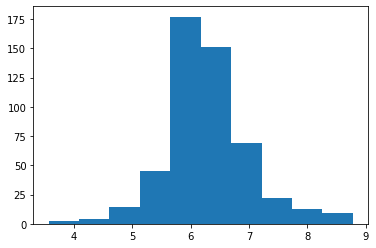

In [75]:
plt.hist(boston.RM)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


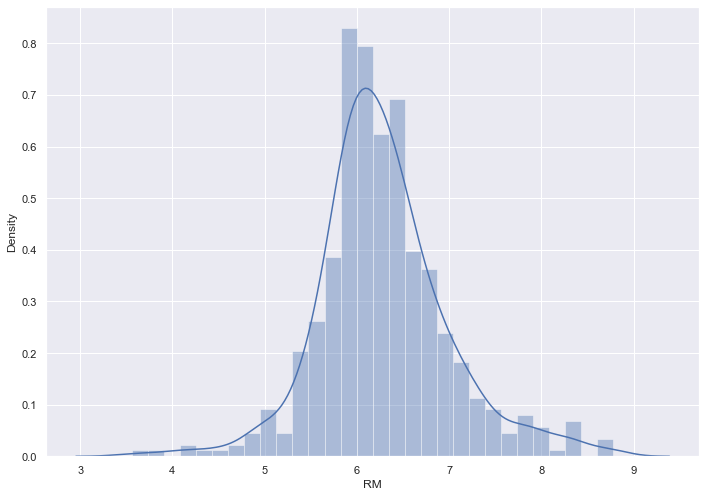

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins=30)
plt.show()

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <BarContainer object of 10 artists>)

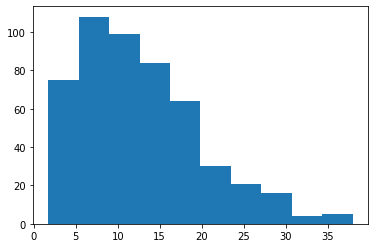

In [66]:
plt.hist(boston.LSTAT)

(array([150., 111.,  81.,  61.,  46.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.1296 ,  2.22929,  3.32898,  4.42867,  5.52836,  6.62805,
         7.72774,  8.82743,  9.92712, 11.02681, 12.1265 ]),
 <BarContainer object of 10 artists>)

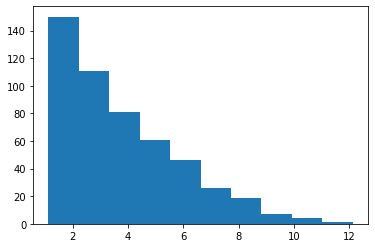

In [67]:
plt.hist(boston.DIS)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

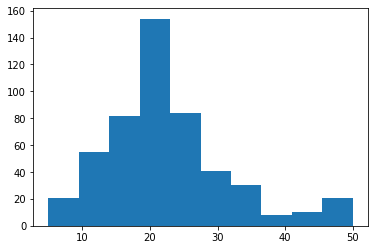

In [68]:
plt.hist(boston.MEDV)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

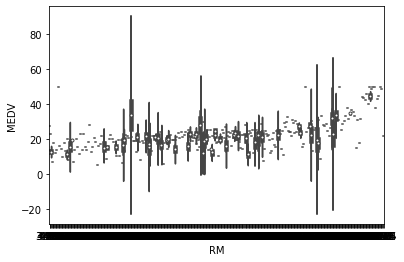

In [76]:
sns.violinplot(x=boston.RM,y=boston.MEDV)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


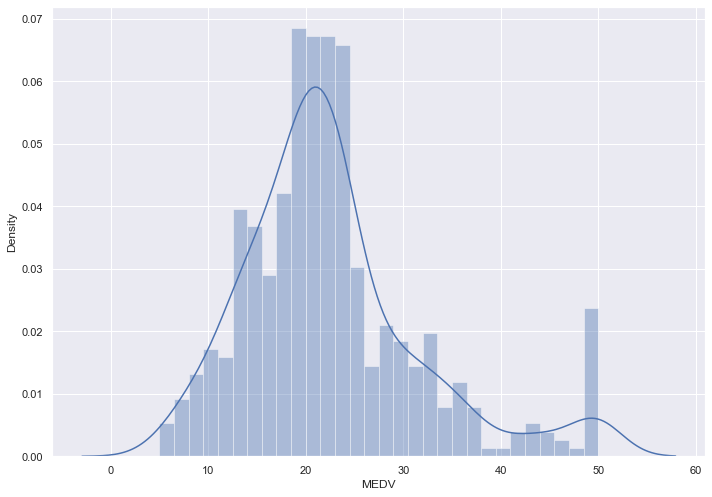

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

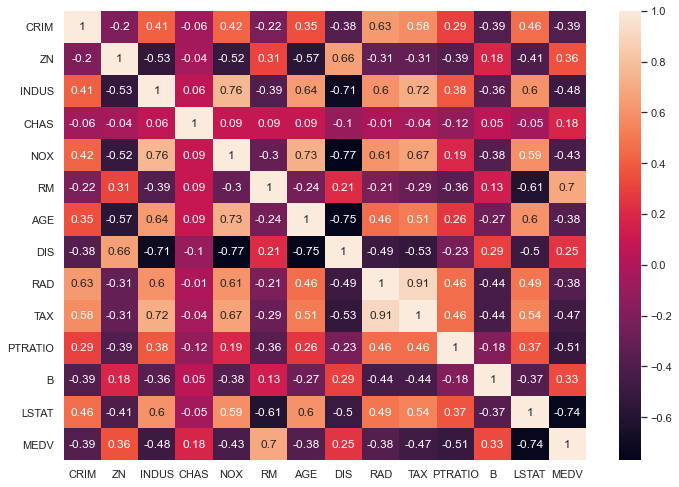

In [79]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# 
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive 
correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By 
looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a
high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, 
TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these 
features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a 
correlation of -0.75.

In [80]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


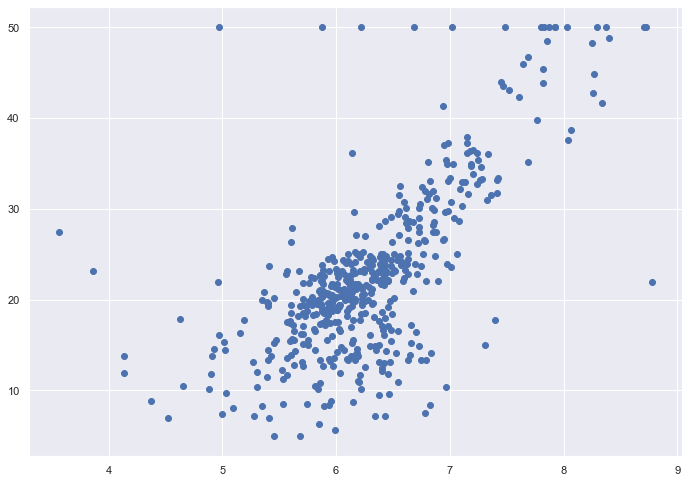

In [81]:
plt.scatter(x=boston.RM,y=boston.MEDV)

In [ ]:
#The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

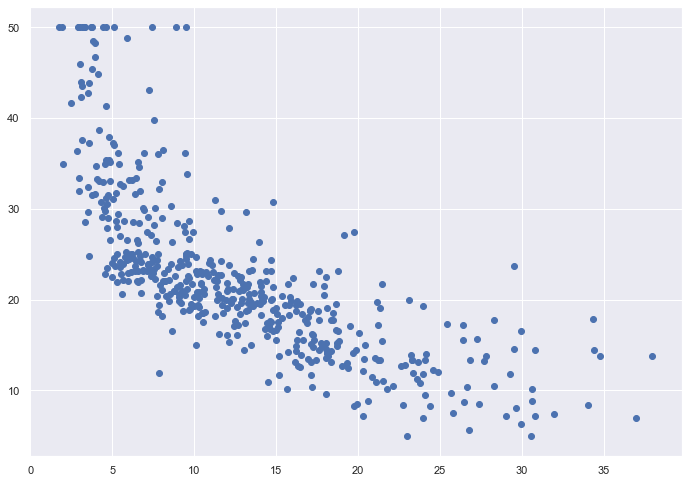

In [82]:
plt.scatter(x=boston.LSTAT,y=boston.MEDV)

In [ ]:
#The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

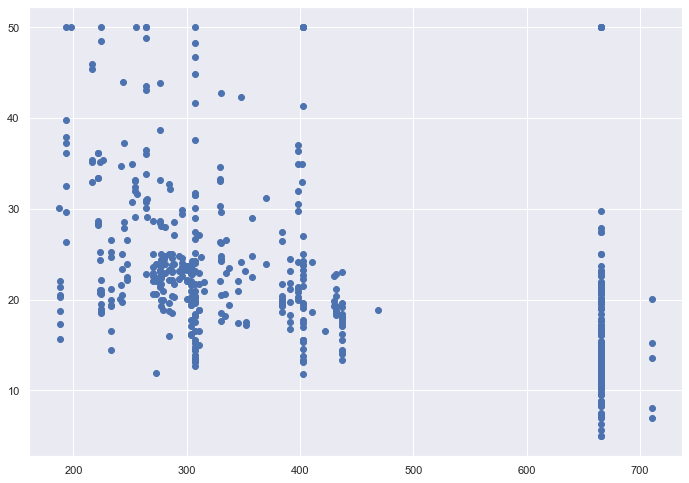

In [89]:
plt.scatter(x=boston.TAX,y=boston.MEDV)

In [90]:
# Preparing the data for training the model We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.
X1 = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y1 = boston['MEDV']

In [93]:
Y1,X1

(0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 506, dtype: float64,
      LSTAT     RM
 0     4.98  6.575
 1     9.14  6.421
 2     4.03  7.185
 3     2.94  6.998
 4     5.33  7.147
 ..     ...    ...
 501   9.67  6.593
 502   9.08  6.120
 503   5.64  6.976
 504   6.48  6.794
 505   7.88  6.030
 
 [506 rows x 2 columns])

In [94]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state=100)

In [96]:
X1_test

,LSTAT,RM
198,6.62,7.274
229,3.76,6.552
502,9.08,6.120
31,13.04,6.072
315,11.50,5.705
...,...,...
272,7.73,6.538
124,17.58,5.879
178,6.92,6.860
447,16.44,6.251


In [97]:
# We use scikit-learn’s LinearRegression to train our model on both the training and test sets.
from sklearn.linear_model import LinearRegression

In [98]:
lin_model = LinearRegression()

In [99]:
lin_model.fit(X1_train, Y1_train)

LinearRegression()

In [100]:
#model evaluation for training set
y_train_predict = lin_model.predict(X1_train)

In [102]:
rmse = (np.sqrt(MSE(Y1_train, y_train_predict)))

In [103]:
print(rmse)

5.244451481824738


In [105]:
y_test_predict = lin_model.predict(X1_test)
rmse = (np.sqrt(MSE(Y1_test, y_test_predict)))

In [106]:
print(rmse)

6.196566241177417


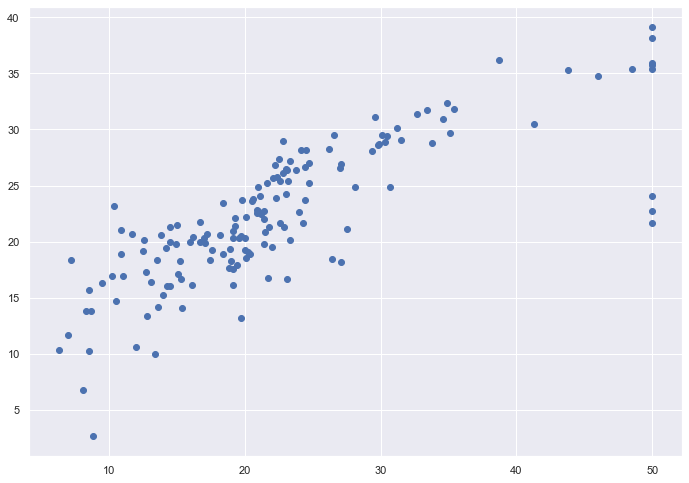

In [107]:
plt.scatter(Y1_test, y_test_predict)

(array([ 4., 23., 60., 42.,  9.,  7.,  4.,  0.,  0.,  3.]),
 array([-12.79658363,  -8.68031708,  -4.56405053,  -0.44778397,
          3.66848258,   7.78474914,  11.90101569,  16.01728224,
         20.1335488 ,  24.24981535,  28.36608191]),
 <BarContainer object of 10 artists>)

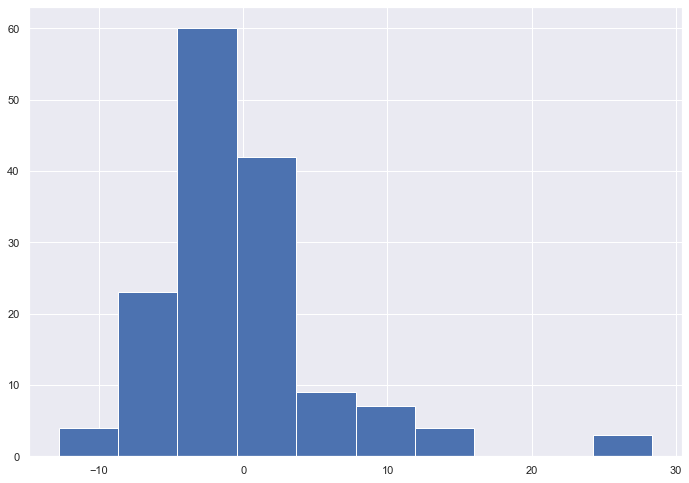

In [108]:
plt.hist(Y1_test-y_test_predict)

# 
Other part

In [109]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [114]:
Y = boston.MEDV

In [115]:
X = boston.drop('MEDV',axis=1)

In [117]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [119]:
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size = 0.3, random_state = 100)

In [120]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 100)

In [121]:
xgb_r.fit(train_x, train_y)

[17:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=100, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=100, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
pred = xgb_r.predict(test_x)

In [123]:
rmse = np.sqrt(MSE(test_y, pred))

In [124]:
rmse

4.702678517918769

# 
other part

In [129]:
train_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,0.09512,0.0,12.83,0.0,0.4370,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,10.23300,0.0,18.10,0.0,0.6140,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
84,0.05059,0.0,4.49,0.0,0.4490,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
359,4.26131,0.0,18.10,0.0,0.7700,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
323,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [130]:
train_dmatrix = xg.DMatrix(data = train_x, label = train_y)
test_dmatrix = xg.DMatrix(data = test_x, label = test_y)

In [132]:
print(train_dmatrix)

In [133]:
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}

In [134]:
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)

[17:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [135]:
pred = xgb_r.predict(test_dmatrix)

In [136]:
pred

array([30.79118  , 25.232437 , 24.180435 , 22.124432 , 22.478231 ,
       21.284527 , 23.11692  , 22.94046  , 22.52206  , 18.893768 ,
       28.438065 , 19.066229 , 23.038942 , 27.683212 , 33.649635 ,
       30.502144 , 30.16868  , 20.36889  , 29.488203 , 32.153393 ,
       24.885601 ,  5.043362 , 19.855581 , 19.10415  , 14.626791 ,
       15.025736 , 31.822094 , 18.925688 , 18.48643  , 24.71696  ,
       21.75688  , 21.736698 , 26.152813 , 24.679838 , 22.55375  ,
       26.717823 ,  9.273767 , 10.87789  , 16.847607 , 23.524866 ,
       22.934164 , 24.224651 , 15.782766 , 22.3139   , 29.394844 ,
       24.159512 , 20.075294 , 18.182917 , 16.547325 , 15.169593 ,
       29.97319  , 21.876022 , 25.039824 , 27.021904 , 13.357123 ,
       18.393658 , 28.540657 , 32.98091  , 10.490913 , 22.016426 ,
       15.101855 , 14.4712715, 19.69336  , 28.254776 , 24.684343 ,
       23.44581  , 20.873531 , 33.965073 , 21.679081 , 24.48791  ,
       16.207722 , 23.682796 ,  9.239361 , 20.089317 , 25.5217

In [137]:
rmse = np.sqrt(MSE(test_y, pred))

In [138]:
rmse

7.478143415184304